### Explore the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
tumor = pd.read_csv('melanoma_tumor.csv')
tumor.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [3]:
tumor.tumor_size.describe()

count    9146.000000
mean        7.723348
std         6.086852
min         0.000000
25%         2.320000
50%         5.060500
75%        13.336000
max        20.999000
Name: tumor_size, dtype: float64

In [4]:
print(tumor.dtypes)
print(tumor.shape)

mass_npea         float64
size_npear        float64
malign_ratio      float64
damage_size       float64
exposed_area      float64
std_dev_malign    float64
err_malign        float64
malign_penalty      int64
damage_ratio      float64
tumor_size        float64
dtype: object
(9146, 10)


In [5]:
tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


### the structure of the data:

The dataset contains The data contains 9,146 rows for each patient, with 10 columns mass_npea, size_npear,	malign_ratio,	damage_size, exposed_area,	std_dev_malign,	err_malign, malign_penalty,	damage_ratio,	tumor_size, most features are numerical continuous except the malign_penalty is a discrete one.

### The main featues of interest:
I'm interested in defining which features are best to predict the tumor_size.

### Features will help in the dataset I think support my investigation into my feature(s) of interest
These variabels are related the most with the size.

[mass_npea, size_npear, damage_size, exposed_area, std_dev_malign]
- mass_npea --> the mass of the area understudy for melanoma tumor
- size_npear --> the size of the area understudy for melanoma tumor
- damage_size --> unrecoverable area of skin damaged by the tumor
- exposed_area --> total area exposed to the tumor
- std_dev_malign --> standard deviation of malign skin measurements

## Univariate Exploration

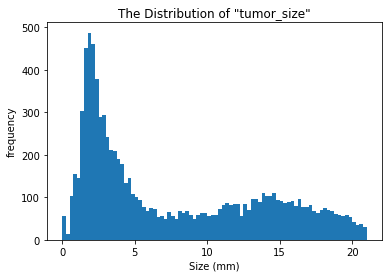

In [39]:
bins = np.arange(0, tumor.tumor_size.max()+0.25, 0.25)
plt.hist(data = tumor, x = 'tumor_size', bins = bins)
plt.xlabel('Size (mm)')
plt.ylabel('frequency')
plt.title('The Distribution of "tumor_size"');

In [7]:
tumor.mass_npea.describe()

count     9146.000000
mean      9903.052174
std       4060.577116
min       2864.760000
25%       6988.420000
50%       8895.965000
75%      12119.950000
max      36995.400000
Name: mass_npea, dtype: float64

In [8]:
tumor.size_npear.describe()

count     9146.000000
mean      3032.827837
std       1462.334147
min        510.530000
25%       1983.657500
50%       2684.330000
75%       3830.745000
max      13535.000000
Name: size_npear, dtype: float64

### with high mass and size of the area we can find limited data points, on the other side most of the data points don't have large mass and size
**(The higher values we get of each, the less people are affected)**

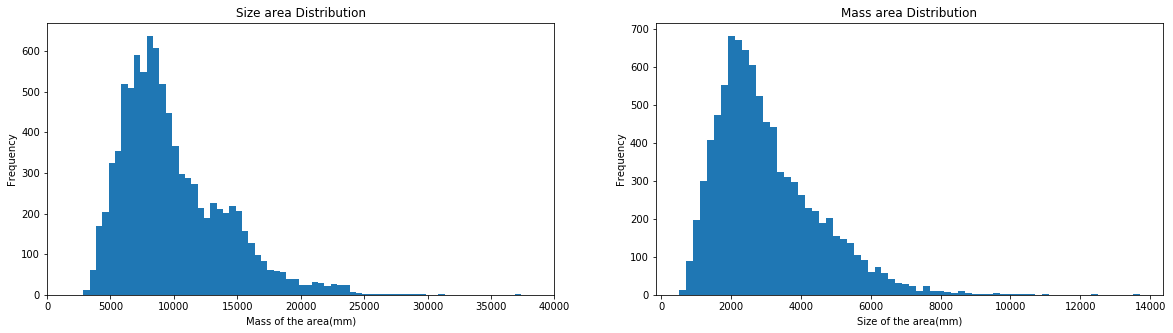

In [45]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) 
bins = np.arange(2865, tumor.mass_npea.max()+500, 500)
plt.hist(data = tumor, x = 'mass_npea', bins = bins)
plt.xlabel('Mass of the area(mm)')
plt.ylabel('Frequency')
plt.xlim(0, 40000)
plt.title('Size area Distribution')

plt.subplot(1, 2, 2) 
bins = np.arange(510, tumor.size_npear.max()+200, 200)
plt.hist(data = tumor, x = 'size_npear', bins = bins)
plt.xlabel('Size of the area(mm)')
plt.ylabel('Frequency')
# plt.xlim(0, 40000);
plt.title('Mass area Distribution');


In [10]:

np.arange(0, tumor['size_npear'].max(), 1000)

array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
        8000.,  9000., 10000., 11000., 12000., 13000.])

### Here I classified the size_npear variable to help me make visualization using categorical variable

In [11]:
tumor['area_size'] = tumor['size_npear'].apply(lambda x: 's1' if (x <= 1000)
                                         else( 's2' if x>1000 and x<=2000   
                                             else( 's3'  if x>2000 and x<=3000
                                                 else( 's4'  if x>3000 and x<=4000
                                                      else ('s5' if x>4000 and x<=5000 else 's6')) )))

tumor['area_size']

0       s3
1       s5
2       s3
3       s5
4       s3
        ..
9141    s4
9142    s4
9143    s2
9144    s6
9145    s2
Name: area_size, Length: 9146, dtype: object

### Here is the most spread area_size is s3 which is between 2000 & 3000.
**this means that the sost of the people are placed between these two values are with small size_npear(the size of the area understudy for melanoma tumor)**

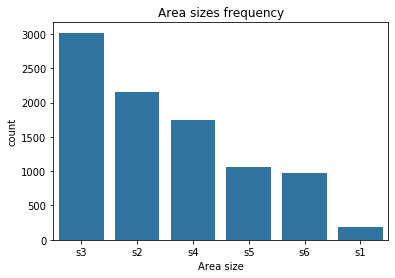

In [42]:
base_color = sb.color_palette()[0]
order_index = tumor.area_size.value_counts().index
sb.countplot(data = tumor, x='area_size', color = base_color, order = order_index)
plt.xlabel('Area size')
plt.title('Area sizes frequency');

**Poth of mass_npea and size_npear are right skewed this means that most data points might has small tumor size.**

Text(0.5, 1.0, 'Mass area Distribution with small bins')

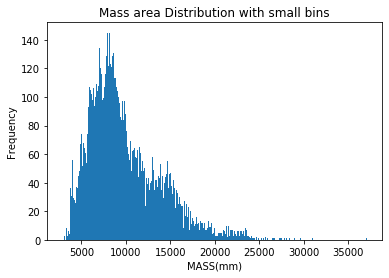

In [46]:
bins = np.arange(2865, tumor.mass_npea.max()+100, 100)
plt.hist(data = tumor, x = 'mass_npea', bins = bins)
plt.xlabel('MASS(mm)')
plt.ylabel('Frequency')
plt.title('Mass area Distribution with small bins');

There are little bit spikes

### Visualize damage_size, exposed_area and std_dev_malign distribution

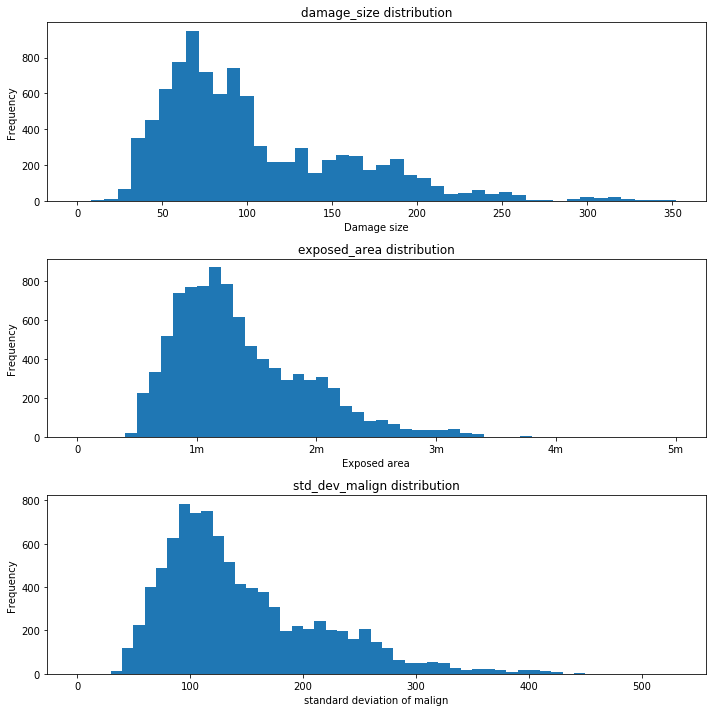

In [88]:
plt.figure(figsize = [10, 10], tight_layout = 5)

plt.subplot(3, 1, 1) 
bins = np.arange(0, tumor.damage_size.max()+8, 8)
plt.hist(data = tumor, x = 'damage_size', bins = bins)
plt.xlabel('Damage size')
plt.ylabel ('Frequency')
plt.title('damage_size distribution')

plt.subplot(3, 1, 2) 
bins = np.arange(0, tumor.exposed_area.max()+100000, 100000)
plt.hist(data = tumor, x = 'exposed_area', bins = bins)
plt.xlabel('Exposed area')
plt.xticks([0, 1e6, 2e6, 3e6, 4e6, 5e6], [0, '1m', '2m', '3m', '4m', '5m'])
plt.ylabel ('Frequency')
plt.title('exposed_area distribution')

plt.subplot(3, 1, 3) 
bins = np.arange(0, tumor.std_dev_malign.max()+10, 10)
plt.hist(data = tumor, x = 'std_dev_malign', bins = bins)
plt.xlabel('standard deviation of malign')
plt.ylabel ('Frequency')
plt.title('std_dev_malign distribution');

In [15]:
tumor.malign_ratio.describe()

count    9146.000000
mean        0.303083
std         0.062533
min         0.114820
25%         0.259053
50%         0.301055
75%         0.343002
max         0.525300
Name: malign_ratio, dtype: float64

### Now I will see malign_ratio(ration of normal to malign) means that higher ratio we get the less spread of Tumor.

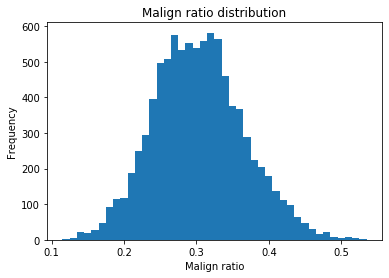

In [47]:
bins = np.arange(tumor.malign_ratio.min(), tumor.malign_ratio.max()+0.01, 0.01)
plt.hist(data = tumor, x = 'malign_ratio', bins = bins)
plt.xlabel('Malign ratio')
plt.ylabel('Frequency')
plt.title('Malign ratio distribution');

Most of the data points have high ratio(Poeple how may have small tumoe size)

In [17]:
tumor.tumor_size.describe()

count    9146.000000
mean        7.723348
std         6.086852
min         0.000000
25%         2.320000
50%         5.060500
75%        13.336000
max        20.999000
Name: tumor_size, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

As shown in first Univariate plot the tumor_size variable is right skewed and most of the data points are placed between 0.5 and 5 tumor size, most of the variables are also right skewed except malign_ratio variable was normally distributed.the dataset has no categorical variable so I've made a new column extracted from area_size variable to help me explore the data with more visualse.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was some data points seem to be like outliers put I didn't remove them because It's logial to find some peolple with very large area size(they are the most cancerous ones), so instead of removing them we need to know how to cure them.the  I've classified the size_npear to 5 classes based on the area size, I converted it to a categorical variable to make it easy for visualizing with the help of numerical data

# Bivariate Exploration
### The most variables that correlate with tumor_size are size_npear and malign_ratio

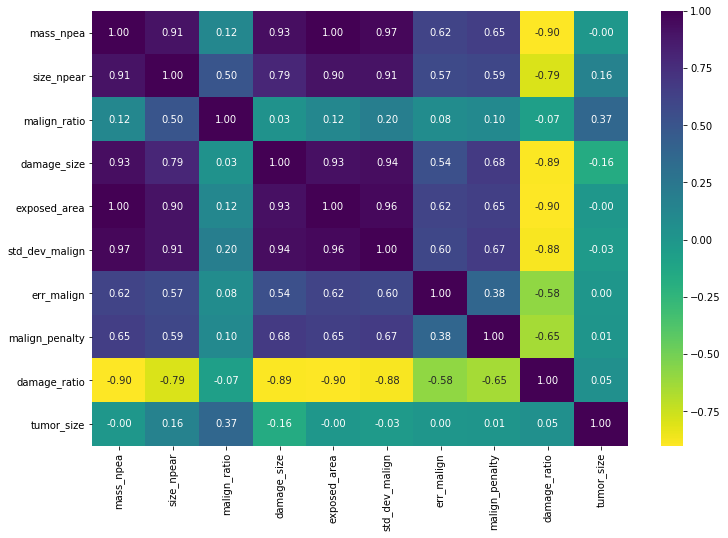

In [18]:
plt.figure(figsize = [12, 8])
sb.heatmap(tumor.corr(),annot = True, cmap = 'viridis_r', fmt = '.2f');

### scatter plot ofr all variables

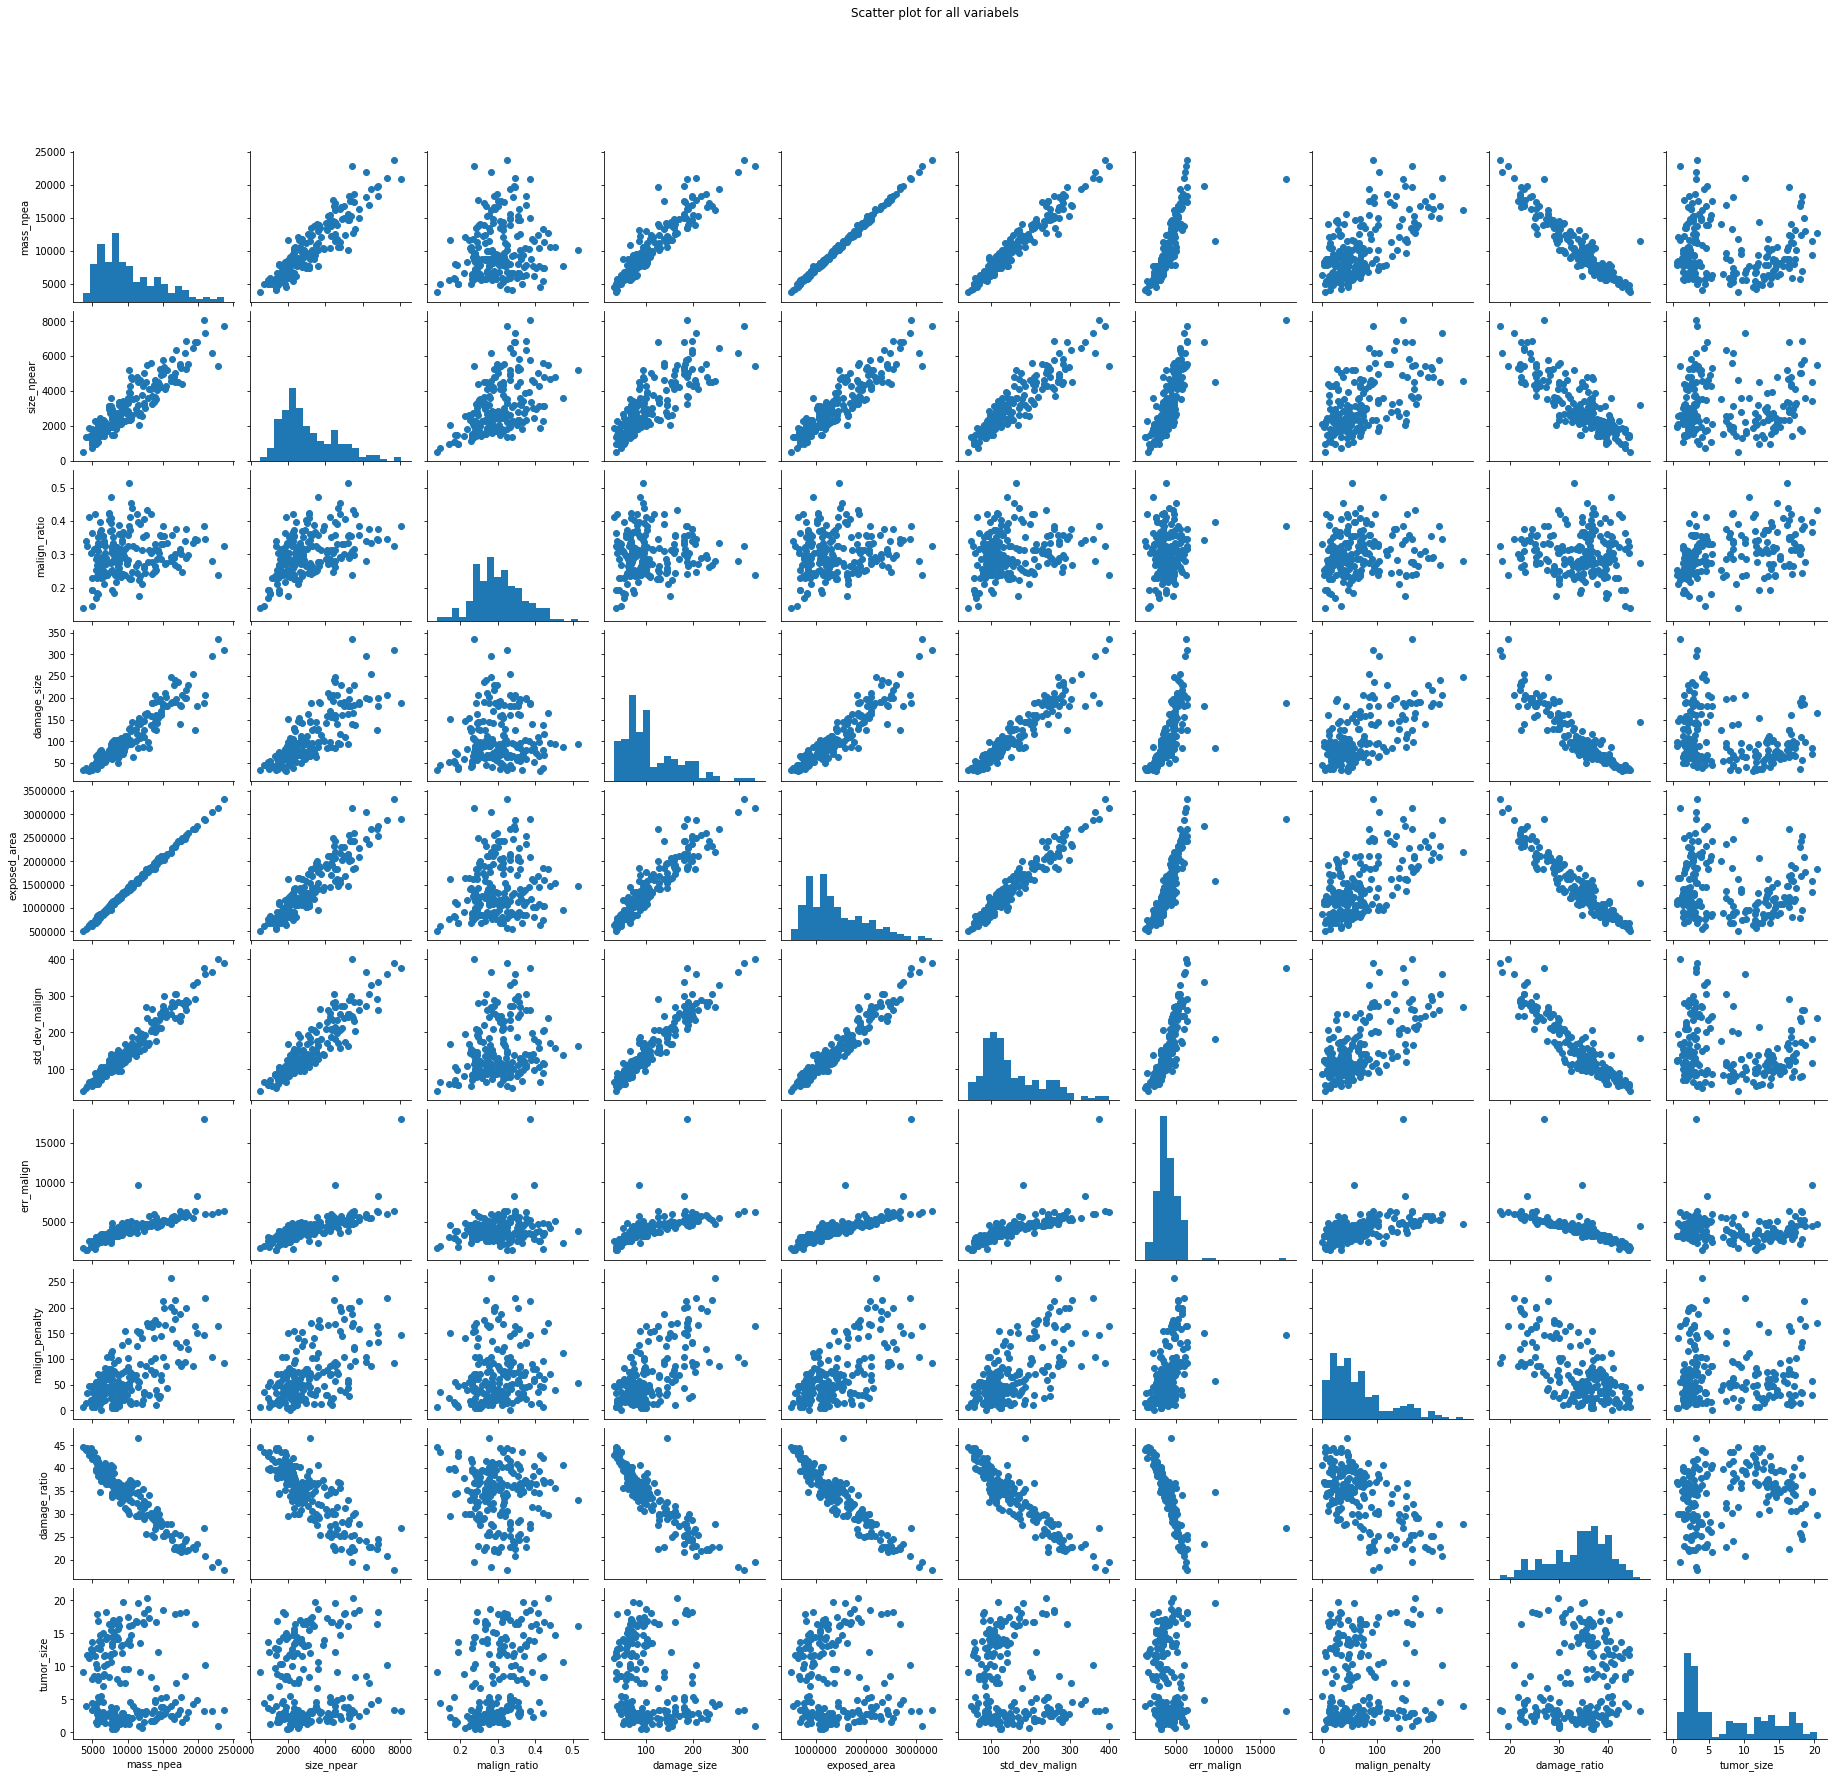

In [79]:
samples = np.random.choice(tumor.shape[0], 200, replace = False)
diamonds_samp = tumor.loc[samples,:]

g = sb.PairGrid(data = diamonds_samp)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter plot for all variabels');

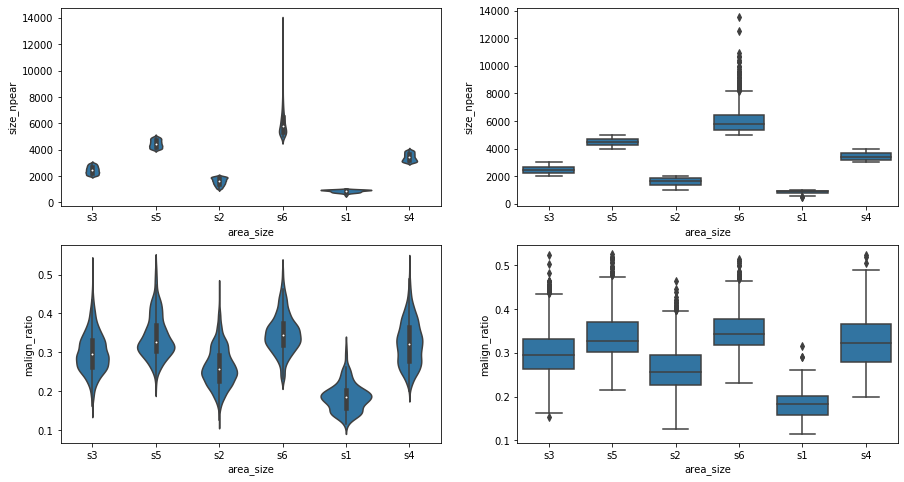

In [20]:
plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

plt.subplot(2, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=tumor, x='area_size', y='size_npear', color=base_color, innner='quartile')

plt.subplot(2, 2, 2)
sb.boxplot(data=tumor, x='area_size', y='size_npear', color=base_color)

plt.subplot(2, 2, 3)
#Let's return the axes object
ax1 = sb.violinplot(data=tumor, x='area_size', y='malign_ratio', color=base_color, innner='quartile')

plt.subplot(2, 2, 4)
sb.boxplot(data=tumor, x='area_size', y='malign_ratio', color=base_color);

### malign_ratio for each area_size class
**Distribution of malign_ratio for each area_size**

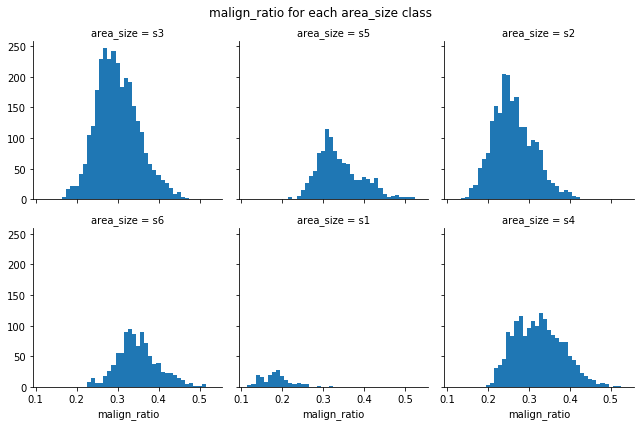

In [78]:
bins_edges = np.arange(tumor.malign_ratio.min(), tumor.malign_ratio.max()+0.01, 0.01)
g = sb.FacetGrid(data = tumor, col = 'area_size', col_wrap = 3)
g.map(plt.hist, 'malign_ratio', bins = bins_edges)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('malign_ratio for each area_size class');

### Here is we can capture a closer look to how some variables correlate with tumor_size
**Still the size_npear and malign_ratio have the strongest correlation**

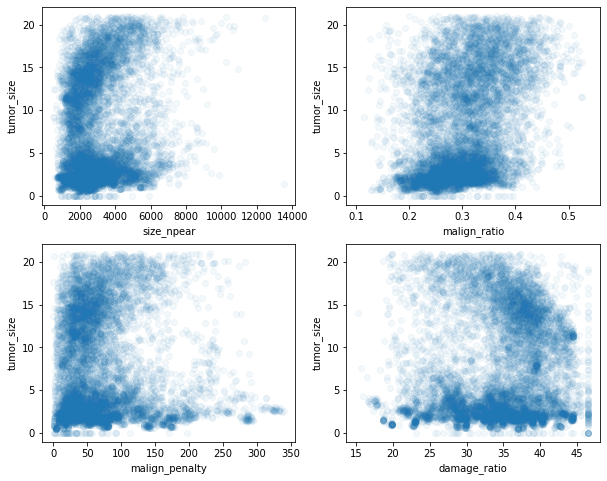

In [52]:
plt.figure(figsize = [10, 8])
base_color = sb.color_palette()[0]

plt.subplot(2, 2, 1)
plt.scatter(data = tumor, x = 'size_npear', y = 'tumor_size', alpha = 0.05)
plt.xlabel('size_npear')
plt.ylabel('tumor_size')

plt.subplot(2, 2, 2)
plt.scatter(data = tumor, x = 'malign_ratio', y = 'tumor_size', alpha = 0.05)
plt.xlabel('malign_ratio')
plt.ylabel('tumor_size')

plt.subplot(2, 2, 3)
plt.scatter(data = tumor, x = 'malign_penalty', y = 'tumor_size', alpha = 0.05)
plt.xlabel('malign_penalty')
plt.ylabel('tumor_size')

plt.subplot(2, 2, 4)
plt.scatter(data = tumor, x = 'damage_ratio', y = 'tumor_size', alpha = 0.05)
plt.xlabel('damage_ratio')
plt.ylabel('tumor_size');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the previous plots we was conserned with variables that correlate with tumor_size and we fount just 2 variables are posetive correlated with it these two variables are size_npear and malign_ratio

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I found according to the heatmap above that ['mass_npea', 'size_npear', 'damage_size','exposed_area', 'std_dev_malign'] have a very strong positive correlation

## Multivariate Exploration

In [23]:
sample = np.random.choice(tumor.shape[0], 200, replace = False)
tumor_sample = tumor.loc[sample]
tumor_sample

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size,area_size
5969,4746.05,910.53,0.19185,44.0566,6.304372e+05,57.3520,2658.89,11,42.6548,6.215,s1
4840,11789.90,3948.27,0.33488,123.4110,1.638196e+06,180.2120,4112.11,24,31.6659,2.990,s4
7726,5739.11,1336.47,0.23287,51.8119,8.316414e+05,71.2598,2859.28,59,40.3002,1.419,s2
6013,9537.46,3070.26,0.32191,73.6033,1.325567e+06,127.9360,3673.98,30,35.0269,20.187,s4
4101,7222.75,1974.17,0.27332,62.7615,9.612794e+05,101.5230,3372.97,52,37.2261,5.487,s2
...,...,...,...,...,...,...,...,...,...,...,...
2532,16677.20,4828.75,0.28954,230.1900,2.309749e+06,273.0110,5661.68,194,22.3046,2.076,s5
2805,6510.08,1796.83,0.27600,69.6736,8.698895e+05,87.2361,2969.60,25,39.0507,2.023,s2
3371,6502.97,2256.40,0.34697,64.5239,9.304766e+05,93.7690,3430.34,66,38.2796,14.442,s3
8423,8840.40,2180.77,0.24668,98.2432,1.250444e+06,136.3520,3999.21,43,34.7216,4.794,s3


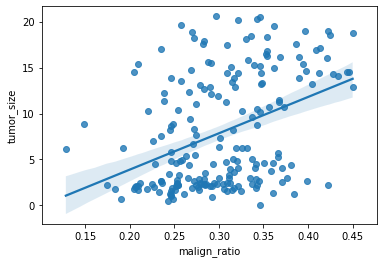

In [24]:
sb.regplot(data = tumor_sample, x = 'malign_ratio', y = 'tumor_size');

### Explore each variable as a third dimention with malign_ratio and tumor_size

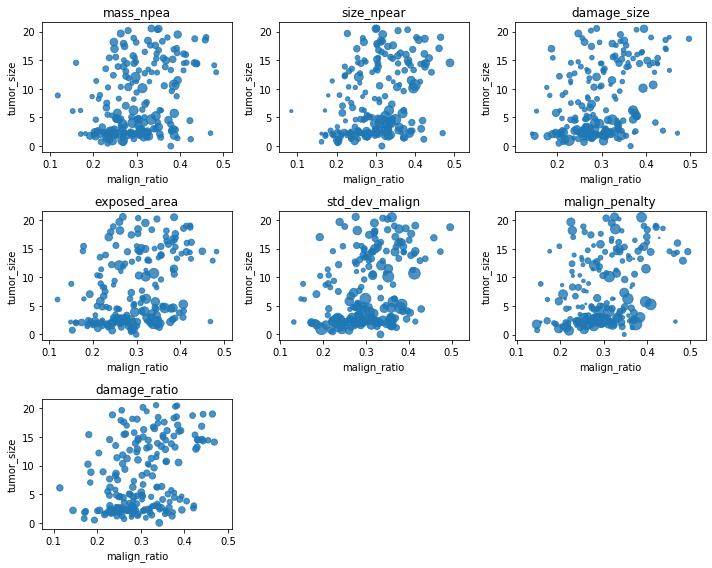

In [25]:
plt.figure(figsize = [10, 8], tight_layout = 5)
base_color = sb.color_palette()[0]

plt.subplot(3, 3, 1)
sb.regplot(data = tumor_sample, x = 'malign_ratio', y = 'tumor_size', x_jitter = 0.05, fit_reg = False, scatter_kws = {'s' : tumor_sample['mass_npea']/250})
plt.title('mass_npea')

plt.subplot(3, 3, 2)
sb.regplot(data = tumor_sample, x = 'malign_ratio', y = 'tumor_size', x_jitter = 0.05, fit_reg = False, scatter_kws = {'s' : tumor_sample['size_npear']/80})
plt.title('size_npear')

plt.subplot(3, 3, 3)
sb.regplot(data = tumor_sample, x = 'malign_ratio', y = 'tumor_size', x_jitter = 0.05, fit_reg = False, scatter_kws = {'s' : tumor_sample['damage_size']/3})
plt.title('damage_size')

plt.subplot(3, 3, 4)
sb.regplot(data = tumor_sample, x = 'malign_ratio', y = 'tumor_size', x_jitter = 0.05, fit_reg = False, scatter_kws = {'s' : tumor_sample['exposed_area']/35e3})
plt.title('exposed_area')

plt.subplot(3, 3, 5)
sb.regplot(data = tumor_sample, x = 'malign_ratio', y = 'tumor_size', x_jitter = 0.05, fit_reg = False, scatter_kws = {'s' : tumor_sample['std_dev_malign']/3})
plt.title('std_dev_malign')

plt.subplot(3, 3, 6)
sb.regplot(data = tumor_sample, x = 'malign_ratio', y = 'tumor_size', x_jitter = 0.05, fit_reg = False, scatter_kws = {'s' : tumor_sample['malign_penalty']/2})
plt.title('malign_penalty')

plt.subplot(3, 3, 7)
sb.regplot(data = tumor_sample, x = 'malign_ratio', y = 'tumor_size', x_jitter = 0.05, fit_reg = False, scatter_kws = {'s' : tumor_sample['damage_ratio']})
plt.title('damage_ratio');

**The more malign_ratio(normal/malign) value the less the damage_size and it's logical.**

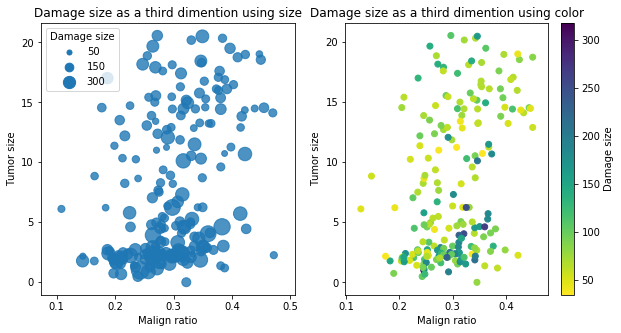

In [84]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.regplot(data = tumor_sample, x = 'malign_ratio', y = 'tumor_size', x_jitter = 0.05, fit_reg = False, scatter_kws = {'s' : tumor_sample['damage_size']})
plt.xlabel('Malign ratio')
plt.ylabel('Tumor size')
plt.title('Damage size as a third dimention using size')

sizes = [50, 150, 300]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s = s/2, color = base_color))
    
plt.legend(legend_obj, sizes, title = 'Damage size')

plt.subplot(1, 2, 2)
plt.scatter(data = tumor_sample, x = 'malign_ratio', y = 'tumor_size', c = 'damage_size', cmap = 'viridis_r')
plt.colorbar(label = 'Damage size')
plt.xlabel('Malign ratio')
plt.ylabel('Tumor size')
plt.title('Damage size as a third dimention using color');

### The relationshipe among  mass_npea, size_npear, damage_size
these three variables strongly corelated to each other

I used two plots to avoid the confusion of the size at the first plot

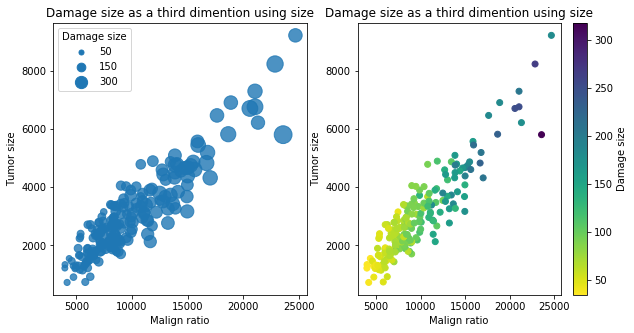

In [85]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.regplot(data = tumor_sample, x = 'mass_npea', y = 'size_npear', x_jitter = 0.05, fit_reg = False, scatter_kws = {'s' : tumor_sample['damage_size']})
plt.xlabel('Malign ratio')
plt.ylabel('Tumor size')
plt.title('Damage size as a third dimention using size')
sizes = [50, 150, 300]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s = s/2, color = base_color))
    
plt.legend(legend_obj, sizes, title = 'Damage size')

plt.subplot(1, 2, 2)
plt.scatter(data = tumor_sample, x = 'mass_npea', y = 'size_npear', c = 'damage_size', cmap = 'viridis_r')
plt.colorbar(label = 'Damage size')
plt.xlabel('Malign ratio')
plt.ylabel('Tumor size')
plt.title('Damage size as a third dimention using size');

### The relationshipe among  std_dev_malign, exposed_area, damage_size
these three variables strongly corelated to each other

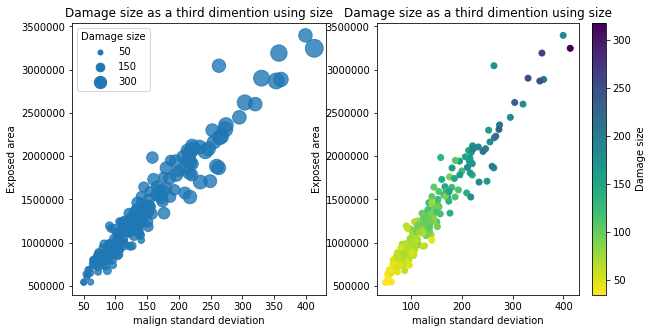

In [86]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.regplot(data = tumor_sample, x = 'std_dev_malign', y = 'exposed_area', x_jitter = 0.05, fit_reg = False, scatter_kws = {'s' : tumor_sample['damage_size']})
plt.xlabel('malign standard deviation')
plt.ylabel('Exposed area')
plt.title('Damage size as a third dimention using size')
sizes = [50, 150, 300]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s = s/2, color = base_color))
    
plt.legend(legend_obj, sizes, title = 'Damage size')

plt.subplot(1, 2, 2)
plt.scatter(data = tumor_sample, x = 'std_dev_malign', y = 'exposed_area', c = 'damage_size', cmap = 'viridis_r')
plt.colorbar(label = 'Damage size')
plt.xlabel('malign standard deviation')
plt.ylabel('Exposed area')
plt.title('Damage size as a third dimention using size');

In [29]:
tumor.columns

Index(['mass_npea', 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'malign_penalty',
       'damage_ratio', 'tumor_size', 'area_size'],
      dtype='object')

### 2 dimensional Histogram for malign_ratio, tumor_size

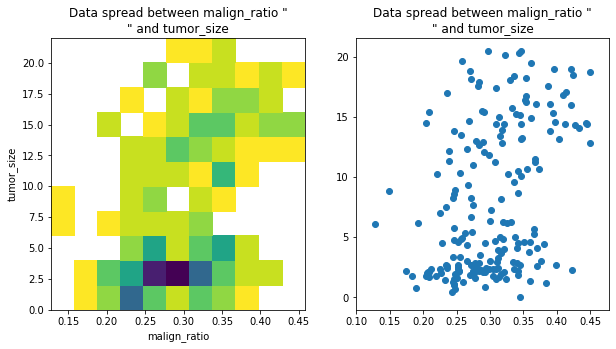

In [72]:
fig, ax = plt.subplots(ncols = 2, figsize = [10, 5])

bins_x = np.arange(tumor_sample.malign_ratio.min(), tumor_sample.malign_ratio.max()+0.03, 0.03)
bins_y = np.arange(0, 21+2, 2)
ax[0].hist2d(data = tumor_sample, x = 'malign_ratio', y = 'tumor_size', cmin = 0.5,
           cmap = 'viridis_r', bins = [bins_x, bins_y])

ax[0].set_xlabel('malign_ratio')
ax[0].set_ylabel('tumor_size')
ax[0].set_title('Data spread between malign_ratio "\n" and tumor_size')

ax[1].scatter(data = tumor_sample, x = 'malign_ratio', y = 'tumor_size')
plt.title('Data spread between malign_ratio "\n" and tumor_size');

### 2 dimensional Histogram for malign_ratio, tumor_size for each value in area_size

In [31]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(tumor.malign_ratio.min(), tumor_sample.malign_ratio.max()+0.03, 0.03)
    bins_y = np.arange(0, 21+2, 2)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

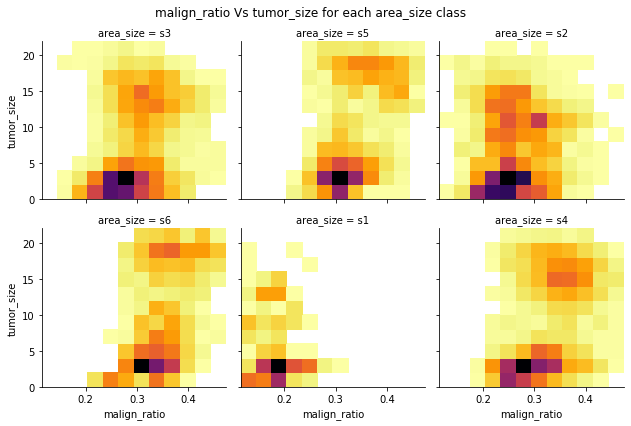

In [77]:
# We got just one categorical variable so I will see the malign_ratio and tumor_size with this third variable.
g = sb.FacetGrid(data = tumor, col = 'area_size', col_wrap = 3, size = 3,
                 xlim = [0, 35])
g.map(hist2dgrid, 'malign_ratio', 'tumor_size', color = 'inferno_r')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('malign_ratio Vs tumor_size for each area_size class');